In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# DATA

In [4]:
#Bank of America 
BAC=pd.read_csv("BAC.csv")

#citiGroup
C=pd.read_csv("C.csv")

#Goldman Sachs
GS=pd.read_csv("GS.csv")

#JPMorgan Chase
JPM=pd.read_csv("JPM.csv")

#Morgan Stanley
MS=pd.read_csv("MS.csv")

#Wells FArgo
WFC=pd.read_csv("WFC.csv")

In [5]:
C['Date']=pd.to_datetime(C.Date, format= '%Y%m%d',errors='ignore')
C.index=C['Date']
BAC['Date']=pd.to_datetime(BAC.Date, format= '%Y%m%d',errors='ignore')
BAC.index=BAC['Date']
GS['Date']=pd.to_datetime(GS.Date, format= '%Y%m%d',errors='ignore')
GS.index=C['Date']
JPM['Date']=pd.to_datetime(JPM.Date, format= '%Y%m%d',errors='ignore')
JPM.index=C['Date']
MS['Date']=pd.to_datetime(MS.Date, format= '%Y%m%d',errors='ignore')
MS.index=MS['Date']
WFC['Date']=pd.to_datetime(WFC.Date, format= '%Y%m%d',errors='ignore')
WFC.index=WFC['Date']

Tickers-The letters that are used to refer to a company's shares on a stock market

In [6]:
tickers=['BAC','C','GS','JPM','MS','WFC']

** Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list.**

In [7]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [8]:
bank_stocks.columns.names=['BAnk Ticker','Stock Info']

In [9]:
bank_stocks.head()

BAnk Ticker         BAC                                                 C  \
Stock Info         Date   Open   High    Low  Close    Volume        Date   
Date                                                                        
2006-01-03   2006-01-03  46.92  47.18  46.15  47.08  16296700  2006-01-03   
2006-01-04   2006-01-04  47.00  47.24  46.45  46.58  17757900  2006-01-04   
2006-01-05   2006-01-05  46.58  46.83  46.32  46.64  14970900  2006-01-05   
2006-01-06   2006-01-06  46.80  46.91  46.35  46.57  12599800  2006-01-06   
2006-01-09   2006-01-09  46.72  46.97  46.36  46.60  15620000  2006-01-09   

BAnk Ticker                       ...     MS                         \
Stock Info    Open   High    Low  ...   High    Low  Close   Volume   
Date                              ...                                 
2006-01-03   490.0  493.8  481.1  ...  58.49  56.74  58.31  5377000   
2006-01-04   488.6  491.0  483.5  ...  59.28  58.35  58.35  7977800   
2006-01-05   484.4  487.8  484.0  ...  58.59  58.02  58.51  5778000   
2006-01-06   488.8  489.0  482.0  ...  58.85  58.05  58.57  6889800   
2006-01-09   486.0  487.4  483.0  ...  59.29  58.62  59.19  4144500   

BAnk Ticker         WFC                                        
Stock Info         Date   Open   High    Low  Close    Volume  
Date                                                           
2006-01-03   2006-01-03  31.60  31.98  31.20  31.90  11016400  
2006-01-04   2006-01-04  31.80  31.82  31.36  31.53  10871000  
2006-01-05   2006-01-05  31.50  31.56  31.31  31.50  10158000  
2006-01-06   2006-01-06  31.58  31.78  31.38  31.68   8403800  
2006-01-09   2006-01-09  31.68  31.82  31.56  31.68   5619600  

[5 rows x 36 columns]

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

BAnk Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**
Where pt is price at the end of month on an asset that pays no divident

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns=pd.DataFrame()

** We used pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
for tick in tickers:
    returns[tick+'Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


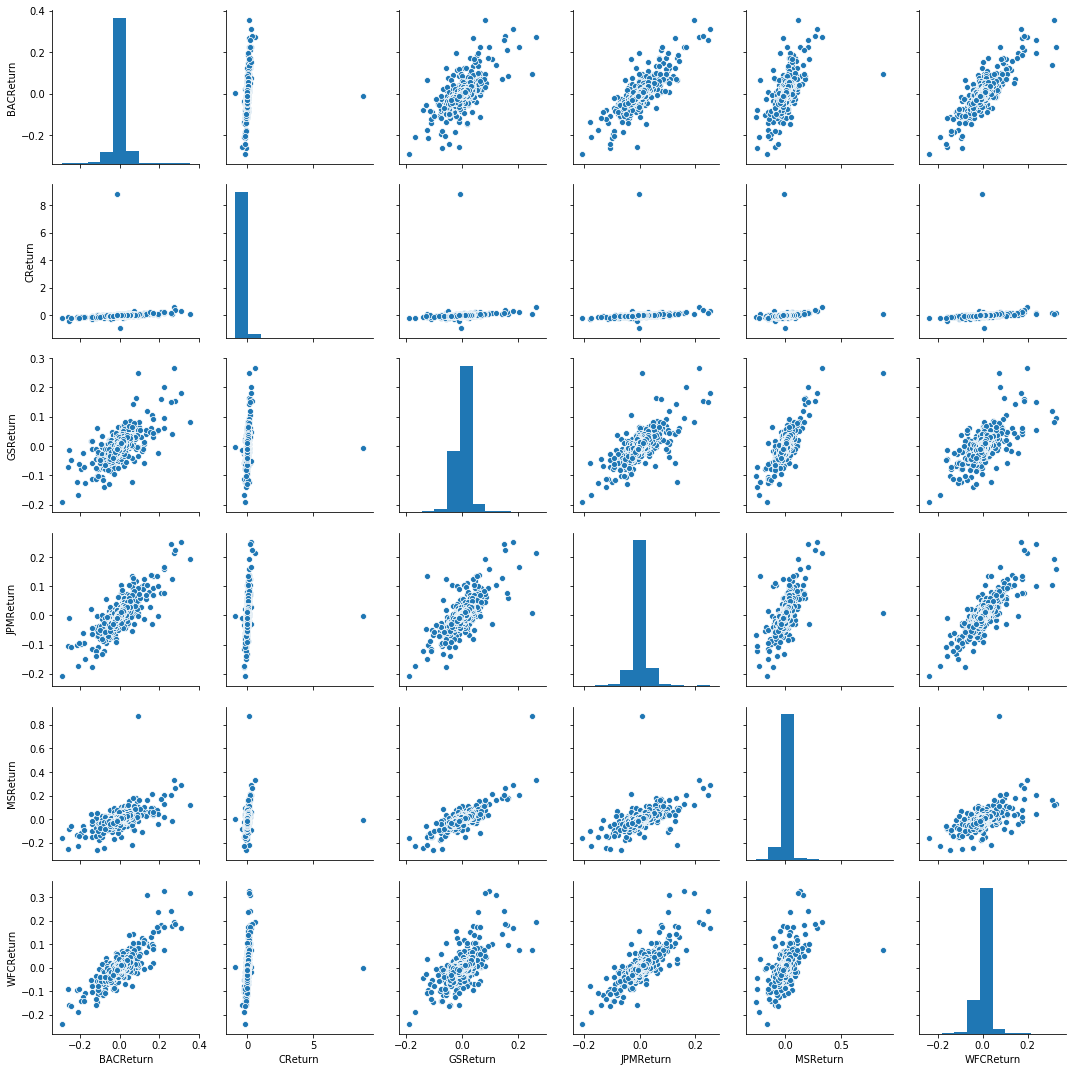

In [12]:
#returns[1:]
sns.pairplot(returns[1:])

In [13]:
returns.idxmin()

BACReturn    2009-01-20
CReturn      2011-05-06
GSReturn     2009-01-20
JPMReturn    2009-01-20
MSReturn     2008-10-09
WFCReturn    2009-01-20
dtype: object

As we can Notice there is worst drop on 20 january 2009, that was the Inaguaration day on which Obama took office

In [14]:
returns.idxmax()

BACReturn    2009-04-09
CReturn      2011-05-09
GSReturn     2008-11-24
JPMReturn    2009-01-21
MSReturn     2008-10-13
WFCReturn    2008-07-16
dtype: object

In [15]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

We can consider Citigroup bank is riskiest because of high deviation value

In [16]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

** creating a displot using seaborn of the 2015 returns for Morgan Stanley

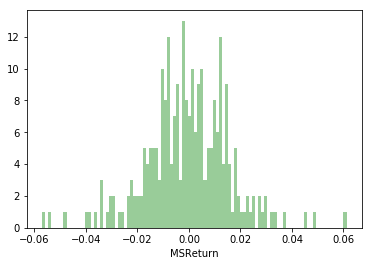

In [17]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=100,kde=False)

**creating a displot using seaborn of the 2008 returna of citi group

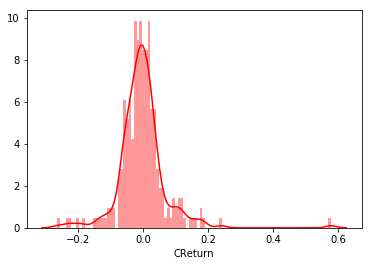

In [18]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=100)

# More VIsulaization

In [19]:
sns.set_style('whitegrid')
import plotly

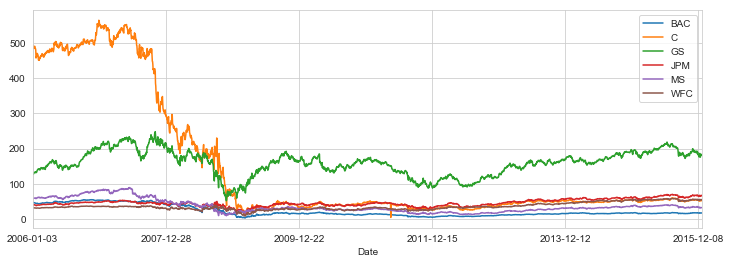

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

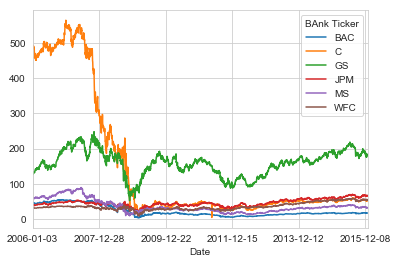

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

# Moving Averages

**PLoting the rolling day average against the close price of BAnk of america's stock of the year 2008

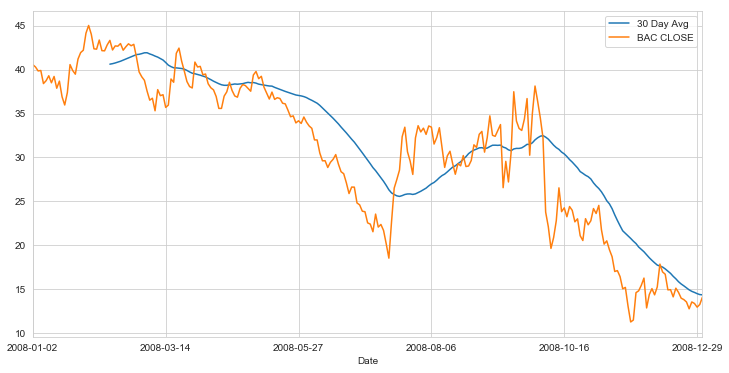

In [22]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

# Correltions

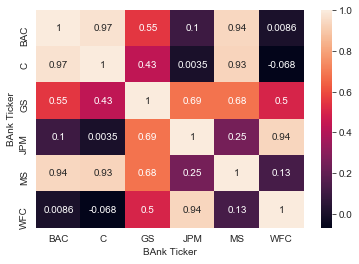

In [23]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

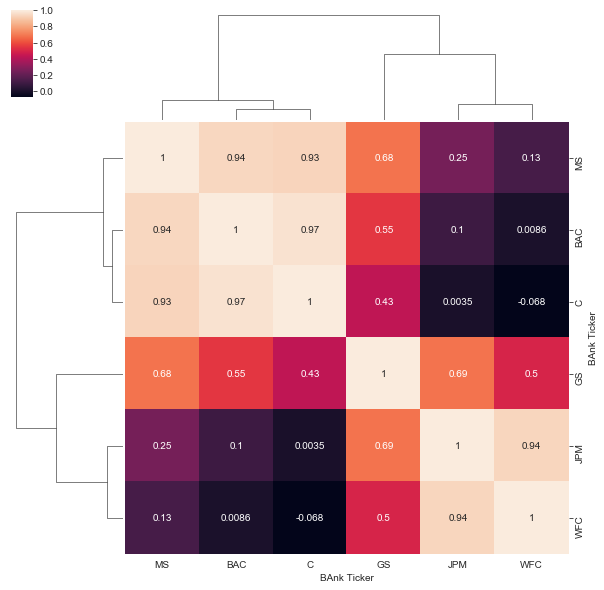

In [24]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Prediction

**using MinMAxScaler algorithm

In [25]:
from sklearn .preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable. Let’s plot the target variable to understand how it’s shaping up in our data:

In [26]:
data=C.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(C)),columns=['Date','Close'])

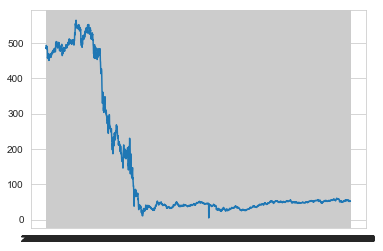

In [27]:
plt.plot(C['Close'], label='Close Price history')

we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

In [28]:
for i in range(0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

While splitting the data into train and validation, we cannot use random splitting since that will destroy the time component

In [29]:
train=new_data[:1887]
valid=new_data[1887:]

In [30]:
new_data.shape, train.shape, valid.shape

((2517, 2), (1887, 2), (630, 2))

In [31]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

('2006-01-03', '2013-07-02', '2013-07-03', '2015-12-31')

In [32]:
preds=[]
for i in range(0,630):
    a=train['Close'][len(train)-630+i:].sum()+sum(preds)
    b=a/630
    preds.append(b)

In [33]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

14.821809555681718

Just checking the RMSE does not help us in understanding how the model performed. Let’s visualize this to get a more intuitive understanding. So here is a plot of the predicted values along with the actual values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



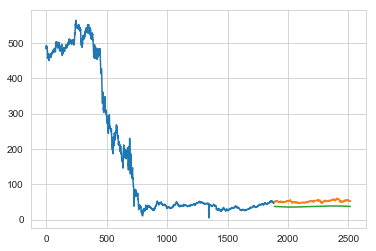

In [34]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

The RMSE value is close to 15 and the results are very  musch promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend slowly and then a decrease after sometime remaining the things same).

# END